https://docs.fast.ai/basic_data.html  
https://docs.fast.ai/data_block.html  --> This notebook is based on this  
https://docs.fast.ai/vision.data.html  
https://docs.fast.ai/vision.data.html#ImageDataBunch  
https://docs.fast.ai/vision.data.html#ImageItemList  

We focus on the use of **ImageDataBunch** (shortcut) and **ImageItemList** classes to generate ImageDataBunch objects.

In [1]:
from fastai.vision import *

The **MNIST_TINY** dataset contains only '3' and '7'.

In [2]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/home/basil/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/basil/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/basil/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/basil/.fastai/data/mnist_tiny/train'),
 PosixPath('/home/basil/.fastai/data/mnist_tiny/valid')]

In [3]:
print(type(path))

<class 'pathlib.PosixPath'>


In [4]:
(path/'train').ls()

[PosixPath('/home/basil/.fastai/data/mnist_tiny/train/3'),
 PosixPath('/home/basil/.fastai/data/mnist_tiny/train/7')]

This is ImageNet folder style :  
- Train, Valid and Test directories.  
- Train and Valid each contains one subdirectory per class.  
- Test contains unlabelled data.

Using **ImageDataBunch**.  

In [5]:
data1 = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)
print(type(data1))

<class 'fastai.vision.data.ImageDataBunch'>


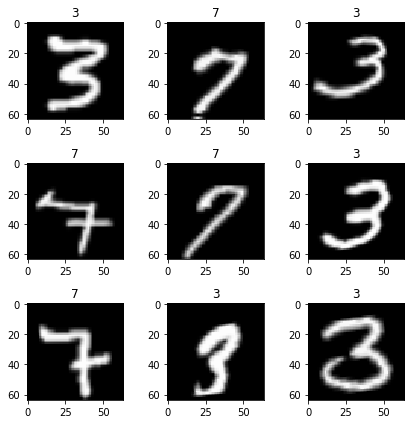

In [6]:
data1.show_batch(3, figsize=(6,6), hide_axis=False)

Using **ImageItemList**.  

In [7]:
data2 = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders
         .split_by_folder()              #How to split in train/valid? -> use the folders
         .label_from_folder()            #How to label? -> depending on the folder of the filenames
         .add_test_folder()              #Optionally add a test set (here default name is test)
         .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
         .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch
print(type(data2))

<class 'fastai.vision.data.ImageDataBunch'>


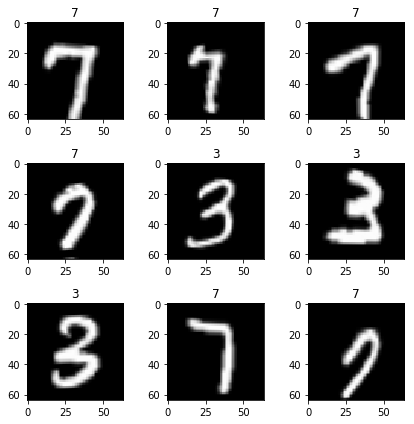

In [8]:
data2.show_batch(3, figsize=(6,6), hide_axis=False)

***

The **PLANET_TINY** dataset contains satellite images.

In [9]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [10]:
planet.ls()

[PosixPath('/home/basil/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/home/basil/.fastai/data/planet_tiny/train')]

All the data is contained within the 'train' directory.  
The class info is contained within the 'labels.csv' file.  

Using **ImageDataBunch**. 

In [11]:
data3 = ImageDataBunch.from_csv(planet,
                                folder='train',
                                size=128,
                                suffix='.jpg',
                                label_delim = ' ',
                                ds_tfms=planet_tfms)
print(type(data3))

<class 'fastai.vision.data.ImageDataBunch'>


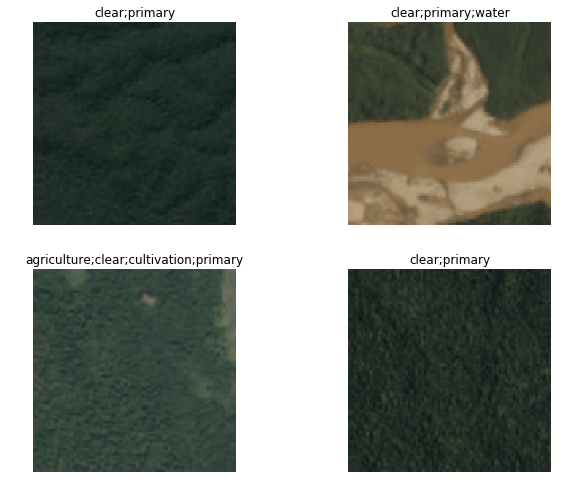

In [12]:
data3.show_batch(rows=2, figsize=(9,7))

Using **ImageItemList**. 

In [13]:
data4 = (ImageItemList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg') #Where to find the data? -> in planet 'train' folder
        .random_split_by_pct()            #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')   #How to label? -> use the csv file
        .transform(planet_tfms, size=128) #Data augmentation? -> use tfms with a size of 128
        .databunch())                     #Finally -> use the defaults for conversion to databunch
print(type(data4))

<class 'fastai.vision.data.ImageDataBunch'>


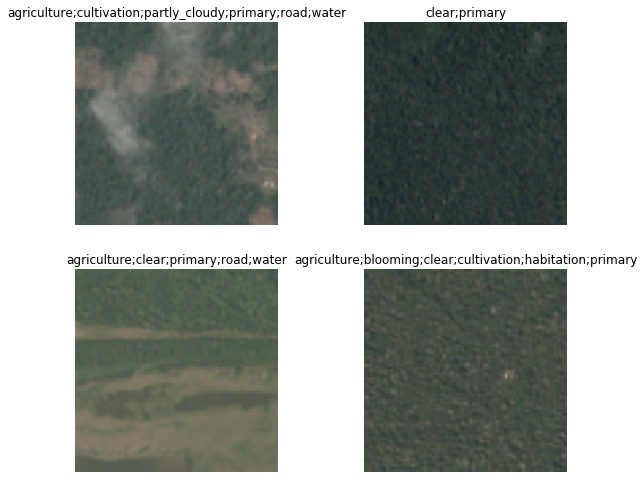

In [14]:
data4.show_batch(rows=2, figsize=(9,7))

***

The **CAMVID_TINY** dataset ...

In [15]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [16]:
camvid.ls()

[PosixPath('/home/basil/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/home/basil/.fastai/data/camvid_tiny/images'),
 PosixPath('/home/basil/.fastai/data/camvid_tiny/labels')]

References  
https://note.mu/mikiokubo/n/na1db5ae3af57     fastaiのデータ作成法  
https://blog.csdn.net/yeyustudy/article/details/86419857     fastai v1.0文档学习（二）  
https://kknews.cc/other/ky6l54p.html      使用FastAI和PyTorch的多層感知器  